In [148]:
!pip install nltk

     |████████████████████████████████| 1.5 MB 4.1 MB/s            
  Using cached click-8.0.3-py3-none-any.whl (97 kB)
     |████████████████████████████████| 76 kB 4.2 MB/s            
     |████████████████████████████████| 288 kB 35.9 MB/s            


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
data = pd.read_excel("data/preprocessed_data.xlsx")
data

<BarContainer object of 14 artists>

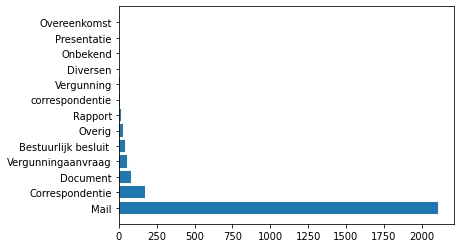

In [7]:
types = ["Mail",                 
"Correspondentie",       
"Document",          
"Vergunningaanvraag",      
"Bestuurlijk besluit ",     
"Overig",              
"Rapport",                  
"correspondentie",   
"Vergunning",            
"Diversen",
"Diversen",      
"Onbekend",                
"Presentatie",              
"Overeenkomst"]    
plt.barh(types, data['type'].value_counts(normalize=False))

In [171]:
data['type'].value_counts(normalize=False)

Mail                   2106
Correspondentie         170
Document                 83
Vergunningaanvraag       53
Bestuurlijk besluit      39
Overig                   27
Rapport                  15
correspondentie           6
Vergunning                5
Diversen                  1
 Diversen                 1
Onbekend                  1
Presentatie               1
Overeenkomst              1
Name: type, dtype: int64

In [180]:
# data['abstract'].apply(len).mean()
# data.abstract.map(len).max()
data['abstract'].str.split().apply(len).value_counts() #distirbution of text lengths

588     9
529     8
246     7
188     7
176     7
       ..
4697    1
161     1
740     1
1332    1
3217    1
Name: abstract, Length: 1415, dtype: int64

In [197]:
#normalizing lengths to use for visualisation
def normalize_length(length:int):
    if length == 0:
        return 0
    return np.log(length) #ln()

In [194]:
data["doc_length"] = [len(doc.split()) for doc in data["abstract"].tolist()]

In [198]:
data["doc_length_normalized"] = data["doc_length"].apply(normalize_length)

In [199]:
data

,type,date,title,abstract,doc_length,doc_length_normalized
0,Overig,2015,Verzoek_regulier__facultatief_advies_uitgebr_p...,\n\n\n\n\n13.16 \n \n\nOns briefkenmerk: ...,833,6.725034
1,Correspondentie,2007-2013,Toezicht_ Correspondentie n.a.v. Toezicht en H...,\n\n\n\n\n \n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\...,4750,8.465900
2,Mail,??,FW Draaiboek demonstratie NAM AZC 24 sept...,"\n\n\nDate : 1-1-0001 00:00:00 \nTo : ""Marco O...",283,5.645447
3,Correspondentie,NaN,Uitgaande mail mededeling akkoord bijdrage aan...,\n\n\n\n\n| bijdrage gemeente Assen Pagina 1 \...,68,4.219508
4,Vergunning,1997,Rapportage n.a.v. vergunningen-meldingen.pdf_j...,\n\n\n\n\n \ncle) \n \n\n\n\n\n\n\n\n\n\n\n...,6,1.791759
...,...,...,...,...,...,...
2504,Bestuurlijk besluit,2005-04-26 00:00:00,BenW besluit BB54473 inzake deelname gem Assen...,\n\n\nÀ \n\nfifi Gemeente Assen \n\n\n\n \n...,2124,7.661056
2505,Document,2005-04-01 00:00:00,Persbericht Energy Valley_,\n\n\n\n\n32.5 \n \n\nÓ Gemeente Assen \n...,412,6.021023
2506,Mail,2004-12-13 00:00:00,Melding betoging 24 september NAM,\n\n\n\n\n\n\nDate : 9-9-2016 10:47:53 \nF B n...,496,6.206576
2507,Document,2004-12-13 00:00:00,Locaties in Groningen_,\n\n\nCentrale meldkamer NAM Assen (CMK) \n\nB...,44,3.784190


In [10]:
data.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2509 entries, 0 to 2508
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Unnamed: 0  2509 non-null   int64         
 1   id          2509 non-null   object        
 2   type        2509 non-null   object        
 3   date        2506 non-null   object        
 4   betterDate  2071 non-null   datetime64[ns]
 5   title       2509 non-null   object        
 6   abstract    2509 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(5)
memory usage: 37.2 MB


In [11]:
data.count()
# remove column record_id
data.drop(columns=["id"], inplace=True)
# remove column 'Unnamed: 0'
data.drop(columns=["Unnamed: 0"], inplace=True)
betterDate = data.betterDate #in case we need it later
data.drop(labels="betterDate", axis=1, inplace=True)

data

,type,date,title,abstract
0,Overig,2015,Verzoek_regulier__facultatief_advies_uitgebr_p...,\n\n\n\n\n13.16 \n \n\nOns briefkenmerk: ...
1,Correspondentie,2007-2013,Toezicht_ Correspondentie n.a.v. Toezicht en H...,\n\n\n\n\n \n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\...
2,Mail,??,FW Draaiboek demonstratie NAM AZC 24 sept...,"\n\n\nDate : 1-1-0001 00:00:00 \nTo : ""Marco O..."
3,Correspondentie,NaN,Uitgaande mail mededeling akkoord bijdrage aan...,\n\n\n\n\n| bijdrage gemeente Assen Pagina 1 \...
4,Vergunning,1997,Rapportage n.a.v. vergunningen-meldingen.pdf_j...,\n\n\n\n\n \ncle) \n \n\n\n\n\n\n\n\n\n\n\n...
...,...,...,...,...
2504,Bestuurlijk besluit,2005-04-26 00:00:00,BenW besluit BB54473 inzake deelname gem Assen...,\n\n\nÀ \n\nfifi Gemeente Assen \n\n\n\n \n...
2505,Document,2005-04-01 00:00:00,Persbericht Energy Valley_,\n\n\n\n\n32.5 \n \n\nÓ Gemeente Assen \n...
2506,Mail,2004-12-13 00:00:00,Melding betoging 24 september NAM,\n\n\n\n\n\n\nDate : 9-9-2016 10:47:53 \nF B n...
2507,Document,2004-12-13 00:00:00,Locaties in Groningen_,\n\n\nCentrale meldkamer NAM Assen (CMK) \n\nB...


## Text pre processing

In [152]:
import nltk

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/alexiscarras/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [154]:
#experimenting with stop words
from nltk.corpus import stopwords
stopwords.words('dutch')

['de',
 'en',
 'van',
 'ik',
 'te',
 'dat',
 'die',
 'in',
 'een',
 'hij',
 'het',
 'niet',
 'zijn',
 'is',
 'was',
 'op',
 'aan',
 'met',
 'als',
 'voor',
 'had',
 'er',
 'maar',
 'om',
 'hem',
 'dan',
 'zou',
 'of',
 'wat',
 'mijn',
 'men',
 'dit',
 'zo',
 'door',
 'over',
 'ze',
 'zich',
 'bij',
 'ook',
 'tot',
 'je',
 'mij',
 'uit',
 'der',
 'daar',
 'haar',
 'naar',
 'heb',
 'hoe',
 'heeft',
 'hebben',
 'deze',
 'u',
 'want',
 'nog',
 'zal',
 'me',
 'zij',
 'nu',
 'ge',
 'geen',
 'omdat',
 'iets',
 'worden',
 'toch',
 'al',
 'waren',
 'veel',
 'meer',
 'doen',
 'toen',
 'moet',
 'ben',
 'zonder',
 'kan',
 'hun',
 'dus',
 'alles',
 'onder',
 'ja',
 'eens',
 'hier',
 'wie',
 'werd',
 'altijd',
 'doch',
 'wordt',
 'wezen',
 'kunnen',
 'ons',
 'zelf',
 'tegen',
 'na',
 'reeds',
 'wil',
 'kon',
 'niets',
 'uw',
 'iemand',
 'geweest',
 'andere']

In [12]:
def tokenizer(text):
    return text.split()
def flatten(list_of_lists):
    return [item for sublist in list_of_lists for item in sublist]

In [13]:
doc_data = data.abstract
docs = doc_data.to_list()

In [14]:
#get all individual words
from collections import Counter
import itertools

tokens = doc_data.map(tokenizer).to_list() #list of tokeniseddocuments
tokens = flatten(tokens) #words
counter = Counter(tokens)
print(counter.most_common(20))
len(tokens)

[('de', 132443), ('van', 94217), ('het', 68073), ('en', 67494), ('in', 44407), ('een', 40449), ('is', 30928), ('te', 28871), ('op', 27187), ('voor', 26851), ('dat', 24182), ('met', 20129), ('aan', 18139), ('De', 17313), ('winningsplan', 15153), ('u', 14897), ('om', 13509), ('niet', 12772), ('zijn', 12515), ('worden', 11389)]


2835214

### Vectorising

assign value (e.g., tf-idf) to each word and represent documents as (sparse) vectors

In [15]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# count_vect = CountVectorizer()
# counts = count_vect.fit_transform(docs)
# tfidf_transformer = TfidfTransformer(use_idf=True)
# tfidf = tfidf_transformer.fit_transform(counts)
# print(counts.shape)
# print(count_vect.vocabulary_.get(u'van'))

In [16]:
#using the vectorizer (which includes the counter) instead...
#high tf-idf --> high term frequency & low document frequency
tfidf_vectorizer = TfidfVectorizer()
tfidf = tfidf_vectorizer.fit_transform(docs) #returns CSR matrix DxV
idf = tfidf_vectorizer.idf_

In [17]:
types = tfidf_vectorizer.get_feature_names_out() #gets unique tokens i.e., types (vocabulary)
tfidf_weights = dict(zip(types, idf)) #type - tfidf_score pairs

In [ ]:
tfidf_vectorizer.vocabulary_.items() #dictionary containing token - tfidf matrix index

In [18]:
tfidf_weights["van"]

1.0519225550270876

In [19]:
tfidf_array = tfidf.toarray() #converting to numpy array

In [20]:
tfidf_array[0]

array([0., 0., 0., ..., 0., 0., 0.])

### Dimensionality Reduction

at this point (without stopword removal) our |V| = 55927. It is useful to transform and reduce our input feature space through dimensionality reduction techniques...

#### Singular Value Decomposition (SVD)

This transformer performs linear dimensionality reduction by means of truncated singular value decomposition (SVD). Contrary to PCA, this estimator does not center the data before computing the singular value decomposition. This means it can work with sparse matrices efficiently.
From: https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.TruncatedSVD.html

In [31]:
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=3, random_state=42)
X_svd = svd.fit_transform(tfidf) #returns shape(n_samples, n_components), type(ndarray), Reduced version of X. This will always be a dense array.

In [32]:
print(f"Total variance explained: {np.sum(svd.explained_variance_ratio_):.2f}")
X_svd.shape

Total variance explained: 0.10


#### Disentanglement with Variational Autoencoder

may help by returning a higher spread for better visualisation and more distinct clustering

#### Exporting stuff...

In [206]:
#exporting the dimensions to JSON
import json
dims_dict = [{'document': doc_i, 'title': data['title'][doc_i], 'doc_length_normalized': data['doc_length_normalized'][doc_i],'x':x, 'y':y, 'z':z} for doc_i, [x,y,z] in enumerate(X_svd)]
json.dump(dims_dict, open("results/len_data.json",'w'), indent=0)

In [205]:
text_dict = [{'document': doc_i, 'abstract': data['abstract'][doc_i]} for doc_i in range(len(data))]
json.dump(text_dict, open("results/text_data.json",'w'), indent=0)

### Clustering

In [57]:
from sklearn.cluster import KMeans

In [144]:
km = KMeans(n_clusters=5, n_init = 15, random_state=42) #ToDo: hyperparameter optimisation
clusters = km.fit_predict(X_svd)
clusters.resize(2509,1)
svd_clustered = np.append(X_svd, clusters, axis=1)


In [248]:
tfidf_array_clustered = np.append(tfidf_array, clusters, axis=1)
tfidf_array_clustered.shape

(2509, 55928)

In [159]:
cluster_centers = km.cluster_centers_ #coordinates of cluster centres

In [168]:
center_dict = [{"cluster": c, "x": x, "y":y, "z": z} for c, [x,y,z] in enumerate(cluster_centers)]
#json.dump(center_dict, open("results/cluster_centers.json",'w'), indent=0)

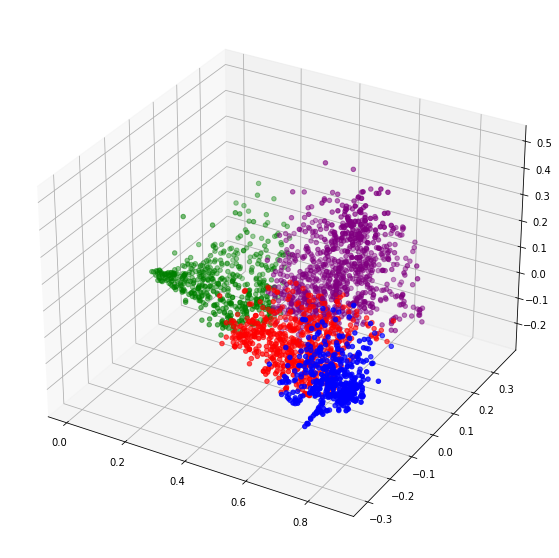

In [145]:
#experimenting with plotting 
import matplotlib
colors = ['red','green','blue','purple']

fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')
ax.scatter(X_svd[:,0],X_svd[:,1], X_svd[:,2], c=svd_clustered[:,3], cmap=matplotlib.colors.ListedColormap(colors) )

In [340]:
dims_dict = [{'document': doc_i, 'title': data['title'][doc_i], 'x':x, 'y':y, 'z':z, 'cluster': svd_clustered[doc_i][3], 'norm_text_length': data['doc_length_normalized'][doc_i]} for doc_i, [x,y,z] in enumerate(X_svd)]
json.dump(dims_dict, open("results/all_data.json",'w'), indent=0)

### Word clouds...

In [208]:
!pip install wordcloud

     |████████████████████████████████| 220 kB 1.4 MB/s            
  Preparing metadata (setup.py) ... done
  Created wheel for wordcloud: filename=wordcloud-1.8.1-cp37-cp37m-macosx_10_15_x86_64.whl size=159114 sha256=6682da0e3663328fe695743e0d016e80cf93aff1703d4d67819d98b5e37afb1c
  Stored in directory: /Users/alexiscarras/Library/Caches/pip/wheels/f8/f6/55/6bd394c32a844a621ca0fe5dbf563c8d71d71edaf095656991
Successfully built wordcloud


In [338]:
from wordcloud import WordCloud

#generates word cloud for the documents of a cluster based on the tf-idf score of its constituent words

#docs should contain doc num and cluster it belongs to

def get_wordclouds(fully_indexed, n_clusters=5, top_n=15):
    
    for cluster in range(n_clusters):
        fully_indexed_per_cluster = {}
        cluster_indices = np.where(tfidf_array_clustered[:,-1]==cluster)
        for row in tfidf[cluster_indices[0]]:
            for (column,value) in zip(row.indices,row.data):
                fully_indexed_per_cluster[index_value[column]] = value     

        wc = WordCloud(width=1200, height=800, background_color="white")
        wordcloud = wc.generate_from_frequencies(fully_indexed_per_cluster)
        fig, ax = plt.subplots(figsize=(10, 6), dpi=100)
        ax.imshow(wordcloud, interpolation='bilinear')
        ax.axis("off")
        fig.suptitle(f"Cluster {cluster}")
        plt.show()
        plt.savefig(f"results/word_cloud_cluster_{cluster}")

    

In [287]:
tfidf
#from https://stackoverflow.com/questions/45232671/obtain-tf-idf-weights-of-words-with-sklearn
index_value = {v: k for k, v in tfidf_vectorizer.vocabulary_.items()} #dictionary --> A mapping of terms to feature indices.

In [317]:
fully_indexed = {}
#returns dictionary of tfidf weights
for row in tfidf:
    for (column,value) in zip(row.indices,row.data):
        fully_indexed[index_value[column]] = value


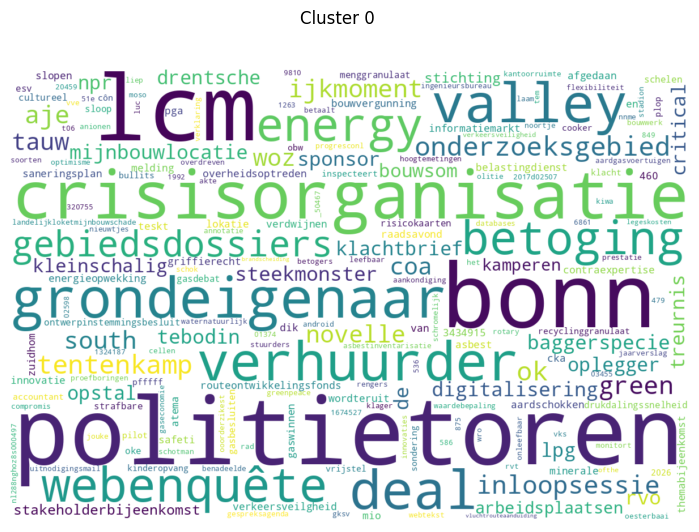

<Figure size 432x288 with 0 Axes>

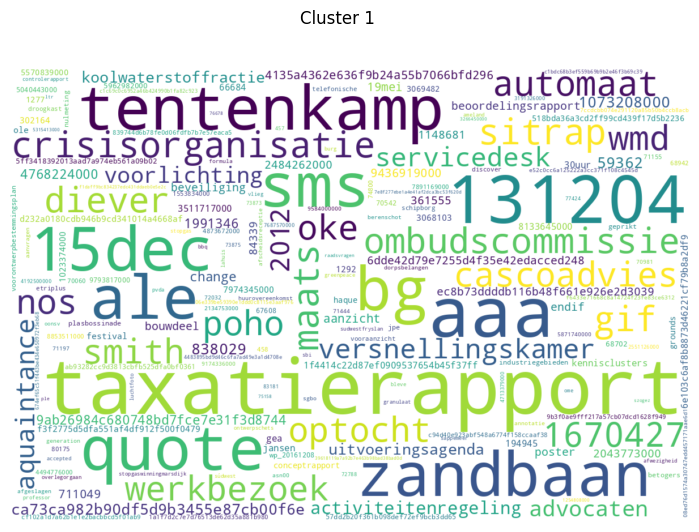

<Figure size 432x288 with 0 Axes>

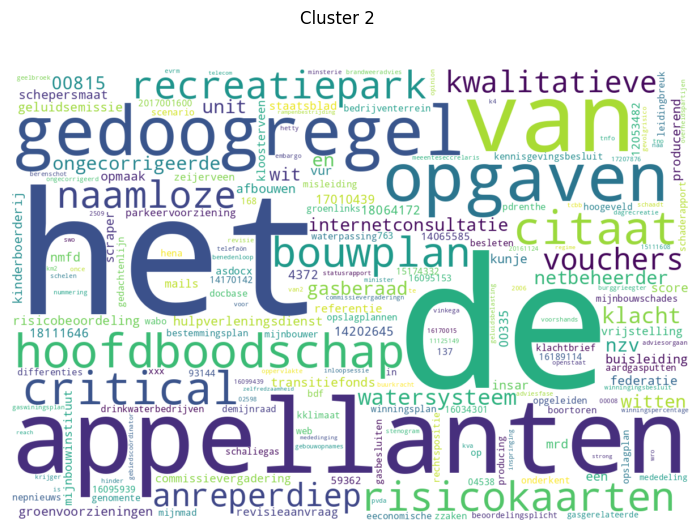

<Figure size 432x288 with 0 Axes>

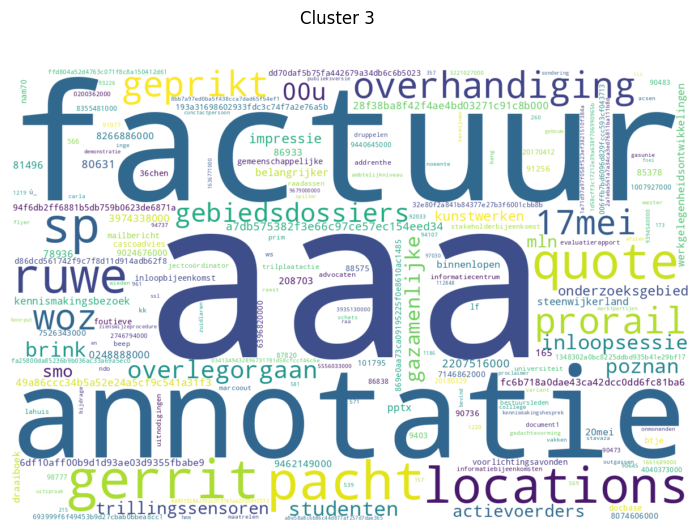

<Figure size 432x288 with 0 Axes>

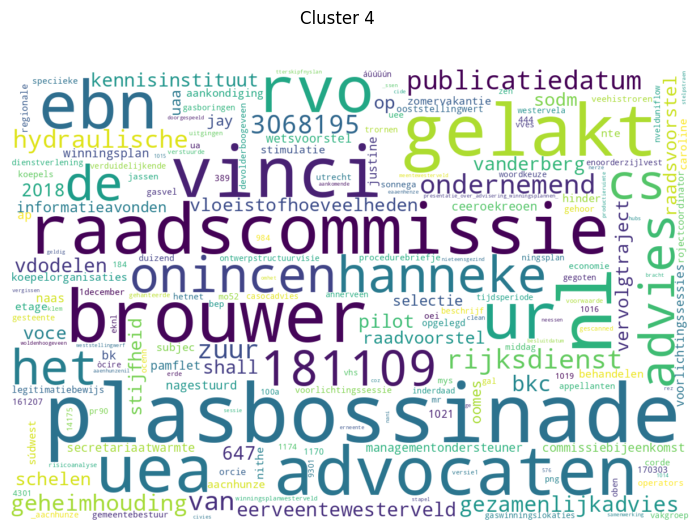

<Figure size 432x288 with 0 Axes>

In [339]:
get_wordclouds(fully_indexed)

In [320]:
res = np.where(tfidf_array_clustered[:,-1]==1)

In [328]:
tfidf[res[0]].shape

(516, 55927)

In [330]:
fully_indexed_per_cluster = {}
n_clusters = 5
#returns dictionary of tfidf weights
for cluster in range(n_clusters):
    cluster_indices = np.where(tfidf_array_clustered[:,-1]==1)
    for row in tfidf[cluster_indices[0]]:
        for (column,value) in zip(row.indices,row.data):
            fully_indexed_per_cluster[index_value[column]] = value

{'anni': 0.09403302941575424,
 'sis': 0.08666852316572325,
 'nao': 0.12309209597936242,
 'tar': 0.09863037260108182,
 'verbindingen': 0.0061630896665534,
 '_bevelvoering': 0.09903468594621158,
 'fe': 0.005437890412946791,
 'rd': 0.021793802497516293,
 'fr': 0.007160195834398346,
 'geweldsbepalingen': 0.030987330069297426,
 'fossiehrij': 0.10560996985966654,
 'groningen': 0.04867437248307429,
 'gascoalitie': 0.10167926452537765,
 'tolerantiegrenzen': 0.029061903397198444,
 'punten': 0.010320154201909185,
 'beleidsuitgangs': 0.029389528912413518,
 'bejegeningsprofiel': 0.1733370463314465,
 'contactpersonen': 0.06537902358185317,
 'schepersmaat': 0.066855023697048,
 '1400': 0.08785739142144079,
 'vanaf': 0.00810123549359242,
 '1600': 0.01141870789316888,
 'uur': 0.06358346091719255,
 '1200': 0.08915964925411017,
 'zaterdag': 0.03173735952011186,
 'wanneer': 0.03688743867013946,
 'inzet': 0.032276291766474674,
 'beven': 0.07902228805609983,
 'gaat': 0.01412890827759351,
 'dag': 0.016535232